In [1]:
# Make own packages auto reload
%load_ext autoreload
%autoreload 2

# Mosaics

In [74]:
from plot import plot_mosaics
from simulate import simulate_rgc_mosaics
import numpy as np

np.random.seed(42)
n_mosaics = 1
center_noise = 0.1  # Position noise
diameter_noise = 0.1

mean_diameters = [20.0]  # Mean diameter for each mosaic
n_missing_list = [0]  # Missing cells per mosaic
overlap_factors = [1.1]  # No overlap, 15% overlap, 10% gaps

# Generate mosaics
groups, polygons, centers, clipped = simulate_rgc_mosaics(
    n_mosaics=n_mosaics,
    mean_diameters=mean_diameters,
    center_noise=center_noise,
    diameter_noise=diameter_noise,
    n_missing_list=n_missing_list,
    overlap_factors=overlap_factors,
)

# Duplicate one cell and shift it a little to create a violator
i_middle = np.argmin(np.sum((centers - np.mean(centers))**2, axis=1)**0.5)

shift = np.array([5, 5])

groups = np.append(groups, groups[-1])
polygons = np.array(list(polygons) + [polygons[i_middle] + shift], dtype='object')
centers = np.vstack([centers, centers[i_middle] + shift])

In [75]:
from overlap import compute_iou_matrix

iou_matrix = compute_iou_matrix(polygons)

In [85]:
centers[-1]

array([55.4344769 , 52.80579709])

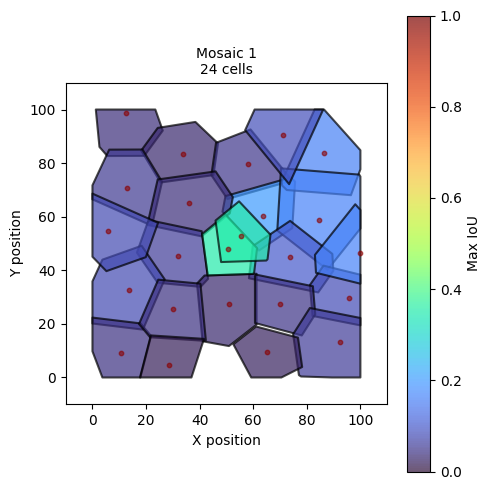

In [76]:
from matplotlib import pyplot as plt

plot_mosaics(groups, polygons, centers, mode='iou', iou_matrix=iou_matrix)
plt.show()

In [79]:
from coverage import CoverageDensityMapper

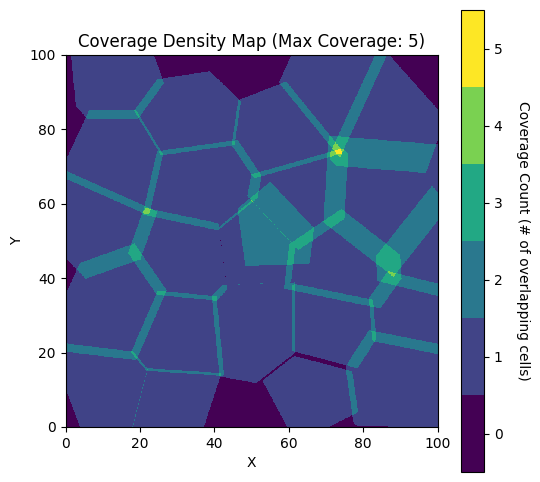

In [108]:
mapper = CoverageDensityMapper(field_bounds=(0, 100, 0, 100))
mapper.add_multiple_polygons(polygons)
mapper.plot_coverage(plot_cell_outlines=None, figsize=(6, 6));

In [102]:
viol_candidates = np.unique(np.where(iou_matrix > 0.35)[0])  # Symmetric

In [103]:
viol_candidates

array([16, 23])

0.44711193213272066


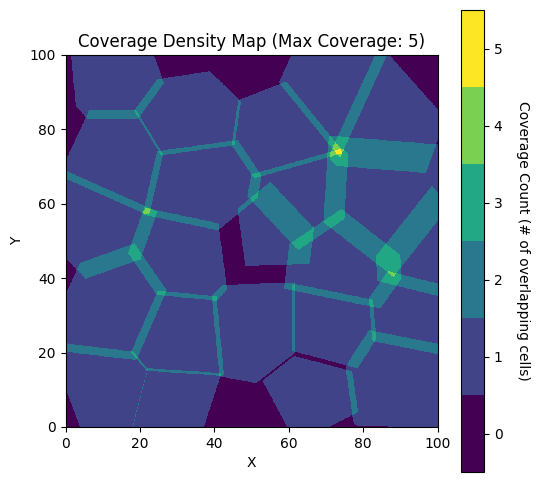

0.4282592367630212


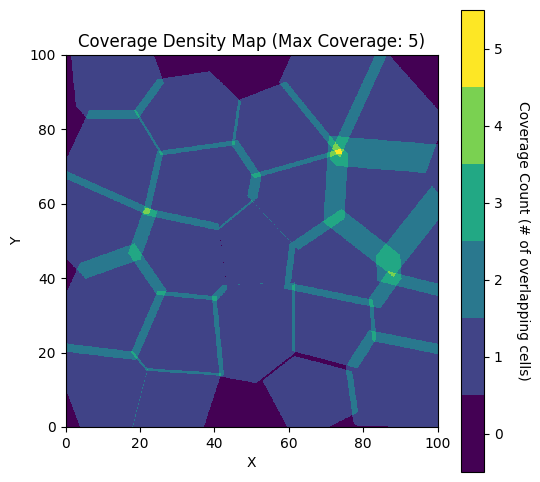

In [113]:
for viol_candidate in viol_candidates:
    mapper = CoverageDensityMapper(field_bounds=(0, 100, 0, 100))
    mapper.add_multiple_polygons(polygons[:viol_candidate])
    mapper.add_multiple_polygons(polygons[viol_candidate+1:])
    print(mapper.get_coverage_statistics()['coverage_std'])
    mapper.plot_coverage(plot_cell_outlines=None, figsize=(6, 6))
    plt.show()
